Для построения модели прогнозирования эффективности технологического процесса золотодобывающего предприятия разделим исследование на несколько частей.

#### Часть 1. Подготовка данных
- [1.1. Изучение общей информации](#section1.1)
- [1.2. Расчет эффективности обогащения золотосодержащей руды](#section1.2)
- [1.3. Анализ признаков, недоступных в тестовой выборке](#section1.3)
- [1.4. Предобработка данных](#section1.4)

#### Часть 2. Анализ данных
- [2.1. Исследование концентрации металлов (Au, Ag, Pb) на различных этапах очистки](#section2.1)
- [2.2. Распределение размеров гранул сырья на обучающей и тестовой выборках](#section2.2)
- [2.3. Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах](#section2.3)

#### Часть 3. Модель
- [3.1. Модель решающего дерева](#section3.1)
- [3.2. Модель случайного леса](#section3.2)
- [3.3. Модель линейной регрессии](#section3.3)
- [3.4. Проверка модели на тестовой выборке](#section3.4)
- [3.5. Проверка адекватности модели](#section3.5)

# 1. Подготовка данных

<a id='section1.1'></a>
#### 1.1. Изучение общей информации

Первым шагом настроим окружение: импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from numpy.random import RandomState
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

Сохраним в переменных data_train, data_test, data_full входные данные с параметрами добычи и очистки - обучающей, тестовой выборок и исходные данные, соответсвенно. Для каждого датасета выведем первые 5 строк  и просмотрим информацию о типах данных таблиц.

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
dataset=[data_train, data_test, data_full]
for data in dataset:
    pd.set_option('display.max_columns', None)
    display(data.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [4]:
for data in dataset:
    display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

None

### Вывод
Входные данные с параметрами добычи и очистки содержат:
1. Обучающую выборку (содержит 87 признаков, из которых 2 целевые: эффективность обогащения чернового концентрата 'rougher.output.recovery' и эффективность обогащения финального концентрата 'final.output.recovery');
2. Тестовую выборку (содержит 53 признака, целевые признаки в датасете отсутствуют);
3. Исходные данные (содержит полную информацию со всеми признаками).

<a id='section1.2'></a>
#### 1.2. Расчет эффективности обогащения золотосодержащей руды

Проверим правильность расчета эффективности обогащения руды. Рассчитаем эффективность на обучающей выборке. Создадим функцию recovery, где аргументы функции:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

In [5]:
def recovery(C, F, T):
    rec = (C*(F-T)) / (F*(C-T))*100
    
    # заполним неадекватные значения эффективности обогащения NaN
    rec[rec<0] = np.nan
    rec[rec>100] = np.nan
    return rec

In [6]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

In [7]:
rec_calc = recovery(C, F, T)

Рассчитаем среднее абсолютное отклонение (MAE) между расчётами эффективности обогащения на обучающей выборке для признака 'rougher.output.recovery' и его значением. Для нахождения MAE уберем строки с NaN значениями.

In [8]:
drop_rec_values = data_train['rougher.output.recovery'].dropna()
drop_rec_calc = rec_calc.dropna()

In [9]:
mae_rec = mean_absolute_error(drop_rec_values, drop_rec_calc)
print('MAE между расчётами эффективности обогащения и значением признака составляет:', mae_rec)

MAE между расчётами эффективности обогащения и значением признака составляет: 9.444891926100695e-15


Значение среднего абсолютного отклонения между расчётами эффективности обогащения для признака на обучающей выборке и его значениями практически равно нулю. Можно сделать вывод, что эффективность обогащения рассчитана правильно.

<a id='section1.3'></a>
#### 1.3. Анализ признаков, недоступных в тестовой выборке

Просмотрим признаки, отсутствующие в тестовой выборке, по сравнению с обучающей.

In [10]:
miss_features = set(data_train.columns) - set(data_test.columns)
display(miss_features)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Признаки, которые отсутсвуют в тестовой выборке, относятся к либо параметрам продукта после каждой стадии обработки золотоносной руды(тип параметра -'output'), либо к расчетным характеристикам (тип параметра - 'calculation'). В тестовом датасете отсутсвуют целевые признаки: final.output.recovery и rougher.output.recovery. Можно сделать вывод, что отсутствие признаков в тестовой выборке связано с невозжностью расчета и измерения значений во время технологического процесса обработки золотосодержащей руды.

<a id='section1.4'></a>
#### 1.4. Предобработка данных

На основе выявленных на предыдущем этапе признаков, недоступных в тестовой выборке, добавим их в выборку из исходных данных. Посмотрим размер тестовой выборки до предобработки.

In [11]:
data_test.shape

(5856, 53)

Создадим датафрейм с признаками, недоступные в тестовой выборке и добавим столбец с временем замеров.

In [12]:
data_for_merge = data_full[miss_features]
data_for_merge = data_for_merge.join(data_full['date'])
display(data_for_merge.head())

,final.output.tail_sol,rougher.output.concentrate_ag,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,secondary_cleaner.output.tail_au,rougher.output.recovery,final.output.concentrate_sol,rougher.output.tail_sol,rougher.calculation.floatbank11_sulfate_to_au_feed,primary_cleaner.output.concentrate_pb,final.output.tail_pb,primary_cleaner.output.tail_ag,secondary_cleaner.output.tail_ag,rougher.output.concentrate_sol,rougher.output.tail_pb,rougher.output.tail_au,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.output.tail_ag,secondary_cleaner.output.tail_pb,rougher.output.concentrate_pb,primary_cleaner.output.tail_pb,rougher.calculation.sulfate_to_au_concentrate,final.output.recovery,final.output.tail_ag,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,final.output.tail_au,rougher.output.concentrate_au,final.output.concentrate_au,secondary_cleaner.output.tail_sol,primary_cleaner.output.concentrate_sol,final.output.concentrate_ag,rougher.calculation.au_pb_ratio,final.output.concentrate_pb,date
0,16.904297,11.500771,7.476074,2.106679,2.606185,87.107763,5.507324,19.154297,3520.337158,10.389648,0.895447,14.936526,14.500184,28.029297,0.508728,1.170244,3481.779053,5.008018,4.694824,7.101074,2.534912,41885.707031,70.541216,10.411962,34.174427,8.547551,2.143149,19.793808,42.192020,8.764648,19.529297,6.055403,2.838687,9.889648,2016-01-15 00:00:00
1,16.634514,11.615865,6.733907,2.353017,2.488248,86.843261,5.257781,18.965234,3489.981857,10.497069,0.927452,16.250511,14.265474,28.067063,0.536689,1.184827,3498.370979,4.955378,4.592547,7.278807,3.049646,42050.861809,69.266198,10.462676,34.118526,8.558743,2.224930,20.050975,42.701629,9.001494,19.369147,6.029369,2.858998,9.968944,2016-01-15 01:00:00
2,16.208849,11.695753,6.471768,2.416800,2.458187,86.842308,5.383759,18.808533,3502.359819,10.354494,0.953716,16.491823,14.115662,27.454037,0.546416,1.162562,3495.348910,4.843460,4.624775,7.216833,3.124664,42018.101184,68.116445,10.507046,33.969464,8.603505,2.257889,19.737170,42.657501,8.842896,19.167579,6.055926,2.945989,10.213995,2016-01-15 02:00:00
3,16.532835,11.915047,6.843791,2.262051,2.322062,87.226430,4.858634,19.330200,3499.162912,8.496563,0.883763,16.024359,13.732071,27.341277,0.542525,1.079755,3498.578313,4.655288,4.482453,7.175616,2.960362,42029.447991,68.347543,10.422762,28.260743,7.221879,2.146849,19.320810,42.689819,9.122857,15.978538,6.047977,3.002340,9.977019,2016-01-15 03:00:00
4,16.525686,12.411054,6.550154,2.277073,2.330448,86.688794,4.939416,19.267422,3506.679315,9.986786,0.792826,16.480185,14.079996,27.041023,0.515438,1.012642,3494.800771,4.552800,4.470737,7.240205,3.112100,42125.354245,66.927016,10.360302,33.044932,9.089428,2.055292,19.216101,42.774141,8.871028,19.199864,6.148599,3.169615,10.142511,2016-01-15 04:00:00


Добавим в тестовую выборку недостающие признаки. Посмотрим размер тестовой выборки после обработки.

In [13]:
data_test = data_test.merge(data_for_merge, on='date')

data_test.shape

(5856, 87)

Для машинного обучения столбец с временем замеров данных не требуется, удалим его во всех выборках.

In [14]:
data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)
data_full = data_full.drop('date', axis=1)

Рассчитаем долю пропущенных значений в данных обучающей и тестовой выборок. Создадим для этого функцию missed_data_fraction и применим к соответствующим выборкам.

In [15]:
def missed_data_fraction(df):
    NaN_fraction = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'Доля пропущенных значений, %': NaN_fraction})
    missing_value_df.sort_values('Доля пропущенных значений, %', inplace=True, ascending=False)
    display(missing_value_df.round(decimals=2).head(10))

In [16]:
missed_data_fraction(data_train)

,"Доля пропущенных значений, %"
rougher.output.recovery,15.26
rougher.output.tail_ag,13.35
rougher.output.tail_sol,13.34
rougher.output.tail_au,13.34
secondary_cleaner.output.tail_sol,11.78
rougher.input.floatbank11_xanthate,11.29
final.output.recovery,9.02
primary_cleaner.input.sulfate,7.75
primary_cleaner.input.depressant,7.49
rougher.calculation.au_pb_ratio,7.37


In [17]:
missed_data_fraction(data_test)

,"Доля пропущенных значений, %"
rougher.output.recovery,9.32
rougher.output.tail_ag,8.32
rougher.output.tail_sol,8.32
rougher.output.tail_au,8.32
final.output.recovery,7.55
rougher.calculation.au_pb_ratio,6.57
rougher.input.floatbank11_xanthate,6.03
primary_cleaner.input.sulfate,5.16
primary_cleaner.input.depressant,4.85
rougher.input.floatbank10_sulfate,4.39


Видно, что наибольшей долей пропущенных значений в обучающей выборке характеризуются признаки с параметрами продукта (тип параметра "output"), которые недоступны, поскольку замеряются и рассчитываются позже.

В условиях задачи указано, что данные индексируются датой и временем получения информации (признак date) и соседние по времени параметры похожи. Заполним пропущенные значения в обучающей и тестовой выборках соответствующими близлежащими.

In [18]:
data_train = data_train.ffill()
data_test = data_test.ffill()
data_full = data_full.ffill()

# 2. Анализ данных

<a id='section2.1'></a>
#### 2.1. Исследование концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

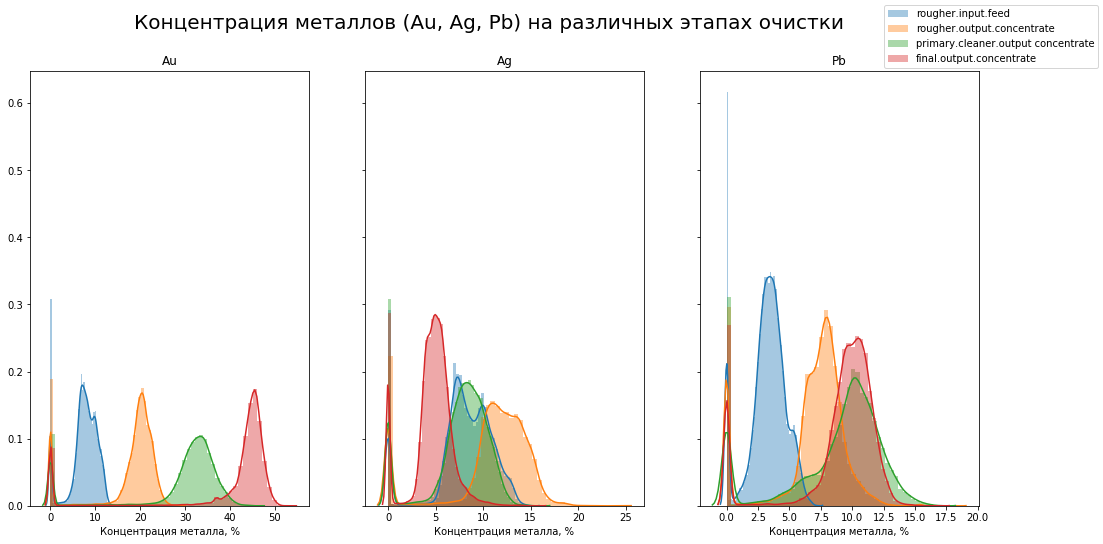

In [19]:
au_data = ["rougher.input.feed_au", "rougher.output.concentrate_au", "primary_cleaner.output.concentrate_au", "final.output.concentrate_au"]
ag_data = ["rougher.input.feed_ag", "rougher.output.concentrate_ag", "primary_cleaner.output.concentrate_ag", "final.output.concentrate_ag"]
pb_data = ["rougher.input.feed_pb", "rougher.output.concentrate_pb", "primary_cleaner.output.concentrate_pb", "final.output.concentrate_pb"]

fig, axes = plt.subplots(1, 3, figsize=(17, 8), sharey=True)
for column in au_data:
    sns.distplot(data_full[column], ax=axes[0])
axes[0].set(title='Au', xlabel='Концентрация металла, %')

for column in ag_data:
    sns.distplot(data_full[column], ax=axes[1])   
axes[1].set(title='Ag', xlabel='Концентрация металла, %')

for column in pb_data:
    sns.distplot(data_full[column], ax=axes[2]) 
axes[2].set(title='Pb', xlabel='Концентрация металла, %')

fig.suptitle('Концентрация металлов (Au, Ag, Pb) на различных этапах очистки', fontsize=20)
fig.legend(['rougher.input.feed', 'rougher.output.concentrate', 'primary.cleaner.output concentrate', 'final.output.concentrate'])
fig.show()

<a id='section2.2'></a>
#### 2.2. Распределение размеров гранул сырья на обучающей и тестовой выборках

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках для правильной оценки модели.

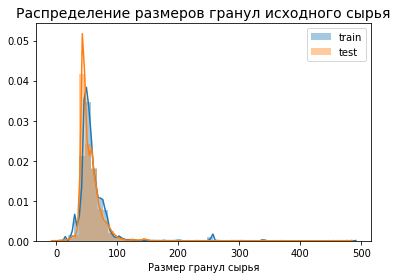

In [20]:
sns.distplot(data_train['rougher.input.feed_size'].dropna(), label='train')
sns.distplot(data_test['rougher.input.feed_size'].dropna(), label='test')

plt.legend()
plt.title('Распределение размеров гранул исходного сырья', fontsize=14)
plt.xlabel('Размер гранул сырья')
fig.show()

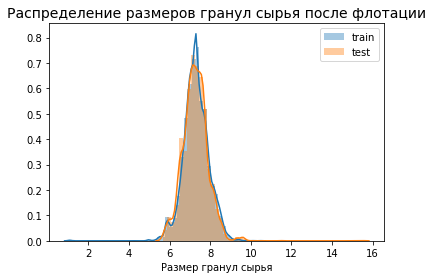

In [21]:
sns.distplot(data_train['primary_cleaner.input.feed_size'].dropna(), label='train')
sns.distplot(data_test['primary_cleaner.input.feed_size'].dropna(), label='test')

plt.legend()
plt.title('Распределение размеров гранул сырья после флотации', fontsize=14)
plt.xlabel('Размер гранул сырья')
fig.show()

<a id='section2.3'></a>
#### 2.3. Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

In [22]:
def input_feed(data):
    inf = data['rougher.input.feed_au'] + data['rougher.input.feed_ag']\
+ data['rougher.input.feed_pb'] + data['rougher.input.feed_sol']
    return inf
    
def crude_concentrate(data):
    cc = data['rougher.output.concentrate_au'] + data['rougher.output.concentrate_au']\
+ data['rougher.output.concentrate_pb'] + data['rougher.output.concentrate_sol']
    return cc
    
def primary_cleaner_concentrate(data):
    pcc = data['primary_cleaner.output.concentrate_au'] + data['primary_cleaner.output.concentrate_ag']\
+ data['primary_cleaner.output.concentrate_pb'] + data['primary_cleaner.output.concentrate_sol']
    return pcc
    
    
def final_concentrate(data):
    fc = data['final.output.concentrate_au'] + data['final.output.concentrate_ag']\
+ data['final.output.concentrate_pb'] + data['final.output.concentrate_sol']
    return fc

In [23]:
full_input_feed = input_feed(data_full)
full_crude_concentrate = crude_concentrate(data_full)
full_primary_cleaner_concentrate = primary_cleaner_concentrate(data_full)
full_final_concentrate = final_concentrate(data_full)

state_list = [full_input_feed, full_crude_concentrate,\
              full_primary_cleaner_concentrate, full_final_concentrate]

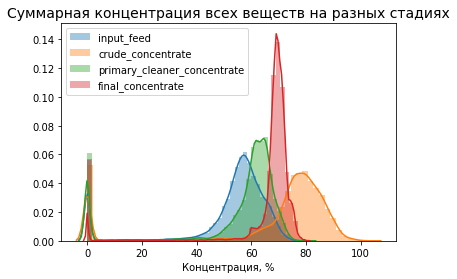

In [24]:
plt.title('Cуммарная концентрация всех веществ на разных стадиях', fontsize=14)

for state in state_list:
    sns.distplot(state)

plt.legend(['input_feed', 'crude_concentrate', 'primary_cleaner_concentrate', 'final_concentrate'])
plt.xlabel('Концентрация, %')
plt.show()

Из представленного графика видно, что в распределении суммарной концентрации всех веществ на разных стадиях имеются аномальные значения при концентрации, равной 0. Отфильтруем данные в тестовой и обучающей выборках, оставим строки в данных, соответствующие суммарной концентрацией всех веществ более 20%.

Для тестовой выборки:

In [25]:
# просмотрим размеры тестовой выборки до фильтрации
data_test.shape

(5856, 86)

In [26]:
test_input_feed = input_feed(data_test)
test_crude_concentrate = crude_concentrate(data_test)
test_primary_cleaner_concentrate = primary_cleaner_concentrate(data_test)
test_final_concentrate = final_concentrate(data_test)

In [27]:
data_test = data_test.loc[(test_input_feed > 20) & (test_crude_concentrate > 20)\
                          & (test_primary_cleaner_concentrate > 20) & (test_final_concentrate > 20)]

In [28]:
# просмотрим размеры тестовой выборки после фильтрации
data_test.shape

(5188, 86)

Для обучающей выборки:

In [29]:
# просмотрим размеры обучающей выборки до фильтрации
data_train.shape

(16860, 86)

In [30]:
train_input_feed = input_feed(data_train)
train_crude_concentrate = crude_concentrate(data_train)
train_primary_cleaner_concentrate = primary_cleaner_concentrate(data_train)
train_final_concentrate = final_concentrate(data_train)

In [31]:
data_train = data_train.loc[(train_input_feed > 20) & (train_crude_concentrate > 20)\
                              & (train_primary_cleaner_concentrate > 20) & (train_final_concentrate > 20)]

In [32]:
# просмотрим размеры обучающей выборки после фильтрации
data_train.shape

(14099, 86)

# 3. Модель

Для решения задачи напишем функцию для вычисления итоговой метрики качества sMAPE (Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

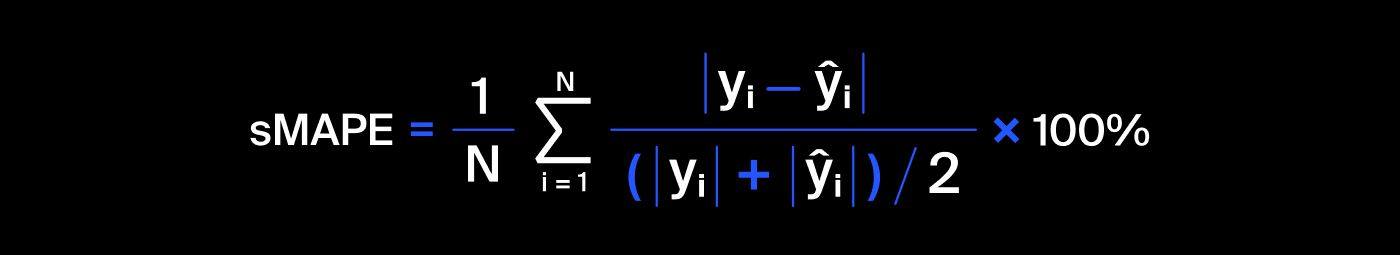

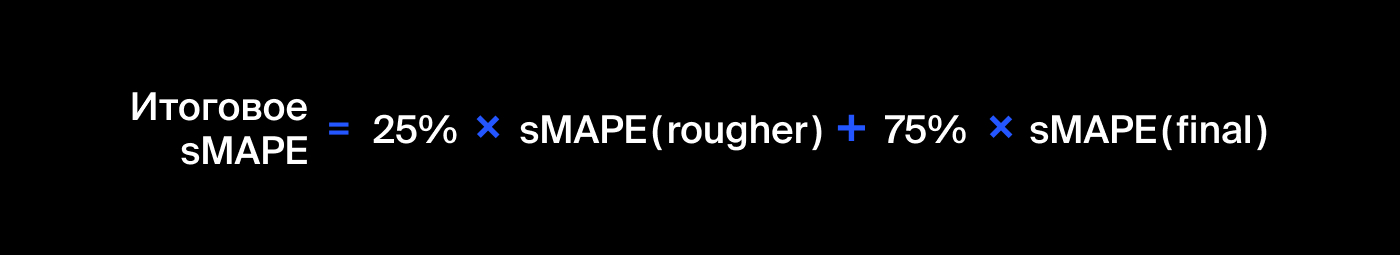

In [33]:
def sMAPE(y_true, y_pred):
#рассчитаем sMAPE эффективности обогащения чернового концентрата
    rougher_true = y_true[:, 0]
    rougher_pred = y_pred[:, 0]    
    rougher_num = np.abs(rougher_true - rougher_pred)
    rougher_denom = (np.abs(rougher_true) + np.abs(rougher_pred)) / 2
    rougher_smape = np.mean(rougher_num/rougher_denom) * 100
    
#рассчитаем sMAPE эффективности обогащения финального концентрата    
    final_true = y_true[:, 1]
    final_pred = y_pred[:, 1]
    final_num = np.abs(final_true - final_pred)
    final_denom = (np.abs(final_true) + np.abs(final_pred)) / 2
    final_smape = np.mean(final_num/final_denom) * 100
    
#рассчитаем итоговую sMAPE    
    result_sMAPE = rougher_smape * 0.25 + final_smape * 0.75
    return result_sMAPE

In [34]:
# сделаем функцию sMAPE функцией оценки 
sMAPE_score = make_scorer(sMAPE)

Создадим переменные для признаков и целевых признаков для обучающей и тестовой выборок.

In [35]:
features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = data_train[['rougher.output.recovery', 'final.output.recovery']]

In [36]:
features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = data_test[['rougher.output.recovery', 'final.output.recovery']]

Преобразуем данные с целевыми признаками на обучающей и тестовой выборках в массив numpy.

In [37]:
target_train = target_train.to_numpy()
target_test = target_test.to_numpy()

<a id='section3.1'></a>
#### 3.1. Модель решающего дерева

In [38]:
for depth in range(1, 6):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    model_score = np.mean(cross_val_score(model, features_train, target_train, cv=5, scoring=sMAPE_score))
    print('Итоговое значение метрики sMAPE для max_depth =', depth, 'составляет:', model_score)

Итоговое значение метрики sMAPE для max_depth = 1 составляет: 9.723330347795567
Итоговое значение метрики sMAPE для max_depth = 2 составляет: 8.61733511049428
Итоговое значение метрики sMAPE для max_depth = 3 составляет: 7.897113822220604
Итоговое значение метрики sMAPE для max_depth = 4 составляет: 7.407409674232679
Итоговое значение метрики sMAPE для max_depth = 5 составляет: 6.835990116978098


<a id='section3.2'></a>
#### 3.2. Модель случайного леса

Ячейку закомментировал, так как долго выполняется операция. Результаты прогнозирования модели случайного леса представлены ниже.

In [39]:
#for est in range(10, 51, 10):
    #model = RandomForestRegressor(n_estimators=est, random_state=12345)
    #model_score = np.mean\
    #(cross_val_score(model, features_train, target_train, cv=5, scoring=sMAPE_score))
    #print('Итоговое значение метрики sMAPE для n_estimators =', est, 'составляет:', model_score)

- Итоговое значение метрики sMAPE для n_estimators = 10 составляет: 2.8440474774052467
- Итоговое значение метрики sMAPE для n_estimators = 20 составляет: 2.620964179237899
- Итоговое значение метрики sMAPE для n_estimators = 30 составляет: 2.537525312172422
- Итоговое значение метрики sMAPE для n_estimators = 40 составляет: 2.503536144123924
- Итоговое значение метрики sMAPE для n_estimators = 50 составляет: 2.4761377823003636

<a id='section3.3'></a>
#### 3.3. Модель линейной регрессии

В модели линейной регрессии укажем агрумент normalize=True для нормализации признаков.

In [40]:
model = LinearRegression(normalize=True)
model.fit(features_train, target_train)
model_score = np.mean(cross_val_score(model, features_train, target_train, cv=5, scoring=sMAPE_score))

print('Итоговое значение метрики sMAPE составляет:', model_score)

Итоговое значение метрики sMAPE составляет: 3.710556246948177


<a id='section3.4'></a>
#### 3.4. Проверка модели на тестовой выборке

По результатам исследования на предыдущих этапах выберем модель случайного леса  и проверим её на тестовой выборке. Зададим оптимальные характеристики модели случайного леса, установленные в части 3.2.

In [41]:
model = RandomForestRegressor(n_estimators=50, random_state=12345)
model_score = np.mean(cross_val_score(model, features_test, target_test, cv=5, scoring=sMAPE_score))
print('Итоговое значение метрики sMAPE составляет:', model_score)

Итоговое значение метрики sMAPE составляет: 2.1209255661785527


<a id='section3.5'></a>
#### 3.5. Проверка адекватности модели

Для оценки исследованной модели случайного леса на адекватность воспользуемся простейшим регрессором DummyRegressor. Выберем параметр классификатора strategy="mean".

In [42]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
dummy_predict = dummy_regr.predict(features_test)
dummy_smape = sMAPE(target_test, dummy_predict)
print('Итоговое значение метрики sMAPE DummyRegressor составляет:', dummy_smape)

Итоговое значение метрики sMAPE DummyRegressor составляет: 7.932703049273567


### Вывод:
Построена модель для прогнозирования процесса восстановления золота из золотосодержащей руды. Проведено исследование трех моделей(решающее дерево, случайный лес, линейная регрессия) и спрогнозированы две величины: эффективность обогащения чернового концентрата (rougher.output.recovery) и эффективность обогащения финального концентрата (final.output.recovery) и с помощью кросс-валидации оценено качество каждой модели.

По результатам исследования выбрана модель случайного леса с n_estimators = 50. Значение метрики качества sMAPE на тестовой выборке для данной модели составляет **sMAPE = ~2.1**. Выполнена проверка на адекватность полученной модели с помощью регрессора DummyRegressor.